['#9D101D', '#2DDC1C']
8 3 True
[0, 0, 1, 1, 0]


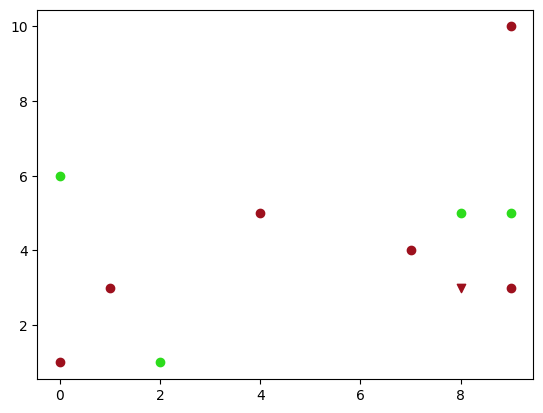

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

labels = 2
labelColors = ["#"+"".join([random.choice("0123456789ABCDEF") for i in range(6)])
                for j in range(labels)]
print(labelColors)


class Point:
  def __init__(self, ukendt=False):
    self.x = random.randint(0, 10)
    self.y = random.randint(0, 10)
    self.ukendt = ukendt

    self.label = random.randint(0,len(labelColors)-1)

  def plot(self):
    if (self.label == None):
      plt.scatter(self.x, self.y, marker="v")

    elif (self.ukendt):
      plt.scatter(self.x, self.y, marker="v", c=labelColors[self.label])

    else:
      plt.scatter(self.x, self.y, marker="o", c=labelColors[self.label])


#en funktion der beregner den eukliske distance mellem to punkter
def euklidDistance(p1, p2):
    return ((p1.x-p2.x)**2+(p1.y-p2.y)**2)**.5


def knn(p, k: int):
  if (k % 2 == 0):
    print("indsat ulige k")
  else:
    minDist = 1000000000000
    closestPoints = {}

    for x in L:
      dist = euklidDistance(p, x)
      closestPoints[dist] = x.label
    closestPoints = dict(sorted(closestPoints.items()))
    kElements = list(closestPoints.values())[:k]
    print(kElements)
    mostFrequentLabel = max(set(kElements), key=kElements.count)
    p.label=mostFrequentLabel

L = [Point() for i in range (10)]
for x in L:
  x.plot()

ukendt = Point(True)
ukendt.label = None
print(ukendt.x, ukendt.y, ukendt.ukendt)

knn(ukendt, 5)
ukendt.plot()
plt.show()



class KNN():
  def __init__(self, x, y, k=5):
    self.x_train = x
    self.y_train = y
    self.k = k

  def get_k_neighbor(self, p):
    dists = []

    for p1 in self.x_train:
      dists.append(euklidDistance,(p1, p))

    indices = np.argpartition(dists, self.k)
    #
    k_neighbors = indices[:self.k]
    #
    return k_neighbors

  def predict(self, p):
   knn_indices = self.get_k_neighbor(p)
   labels = []

   for i in knn_indices:
     labels.append(self.y_train[i])

   occ = np.bincount(labels)
   return np.argmax(occ)

  def calculate_accuracy(self, y_test, predictions):
    correct_ans = y_test == predictions
    acc = (np.sum(correct_ans)/y_test.shape[0])*100

    return acc

    k_values = range(1, 26, 2)
    acurracy = []

    for k in k_values:
      preds = []
      knn = KNN(x_train, y_train, k)

      for x in x_test:
        preds.append(knn.predict(x))
      accuracy.append(knn.calculate_accuracy(y_test, preds))

    plt.plot(k_values, accuracy)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()